# Importerer nødvendige biblioteker

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæsning af data

In [4]:
df = pd.read_csv('../data/Clean_Dataset.csv', index_col=0)
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
42028,Indigo,6E-2028,Delhi,Afternoon,one,Night,Chennai,Economy,8.25,43,4729
130787,Air_India,AI-770,Kolkata,Night,one,Night,Mumbai,Economy,26.92,22,6786
51379,GO_FIRST,G8-7536,Mumbai,Afternoon,zero,Afternoon,Delhi,Economy,2.08,43,2339
281856,Vistara,UK-876,Hyderabad,Night,one,Evening,Bangalore,Business,20.17,30,38099
4584,SpiceJet,SG-2976,Delhi,Evening,one,Night,Mumbai,Economy,4.50,24,5613


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# Rensning af data

In [7]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Tjekker for NaN-værdier:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops       

In [8]:
df.shape

(300153, 11)

Som man kan se, indeholder datasættet ikke nogen manglende værdier, hverken som NaN eller null. Derudover består datatyperne primært af tekstdata (object), som nu skal konverteres til string, samt nogle numeriske kolonner i form af heltal (int64) og decimaltal (float64).

Der er heller ingen duplikater i datasættet, hvilket betyder, at der ikke er behov for rensning af dataen.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, så det bliver lettere at arbejde målrettet med hver type.

In [10]:
# Fjerner 'flight' kolonnen, da den kun er en identifikator og ikke bidrager til analysen
df.drop(['flight'], axis=1, inplace=True)  

# Fjerner 'departure_time' kolonnen, da den ikke er relevant for vores forskningsspørgsmål om dage før afrejse og antal stop
df.drop(['departure_time'], axis=1, inplace=True)  

# Fjerner 'arrival_time' kolonnen, da den ikke er relevant for vores forskningsspørgsmål om dage før afrejse og antal stop
df.drop(['arrival_time'], axis=1, inplace=True)  

In [11]:
# Udfører one-hot encoding på de kategoriske kolonner for at gøre dem numeriske og lettere at regressere på
dfNumeric = pd.get_dummies(df, columns=['airline', 'source_city', 'stops', 'destination_city', 'class'], dtype=pd.Int64Dtype())

# Viser 5 tilfældige rækker af det transformerede datasæt
dfNumeric.sample(5)

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
206395,19.92,46,4086,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
66426,2.58,29,4499,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
86306,5.50,13,10744,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
21795,2.08,12,5955,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
233961,17.50,47,54608,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

airline             string[python]
source_city         string[python]
stops               string[python]
destination_city    string[python]
class               string[python]
duration                   float64
days_left                    int64
price                        int64
dtype: object

# Dataudforskning

In [14]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Duration: Varierer fra 0,83 til 49,83 timer, med et gennemsnit på 12,22 timer.

Days_Left: Varierer fra 1 til 49 dage, med et gennemsnit på 26 dage.

Price: Priserne spænder fra 1.105 til 123.071, med en gennemsnitlig pris på 20.890.

Der er stor variation i priserne, hvilket sandsynligvis skyldes forskelle i sæson, rejseklasse og flyselskab.

In [16]:
df.columns

Index(['airline', 'source_city', 'stops', 'destination_city', 'class',
       'duration', 'days_left', 'price'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [18]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'SOURCE-CITY', 'STOPS', 'DESTINATION-CITY', 'CLASS',
       'DURATION', 'DAYS-LEFT', 'PRICE'],
      dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres.

For at lave en grundlæggende visualisering og udforske fordelingen af prisdataene, laver vi et histogram.

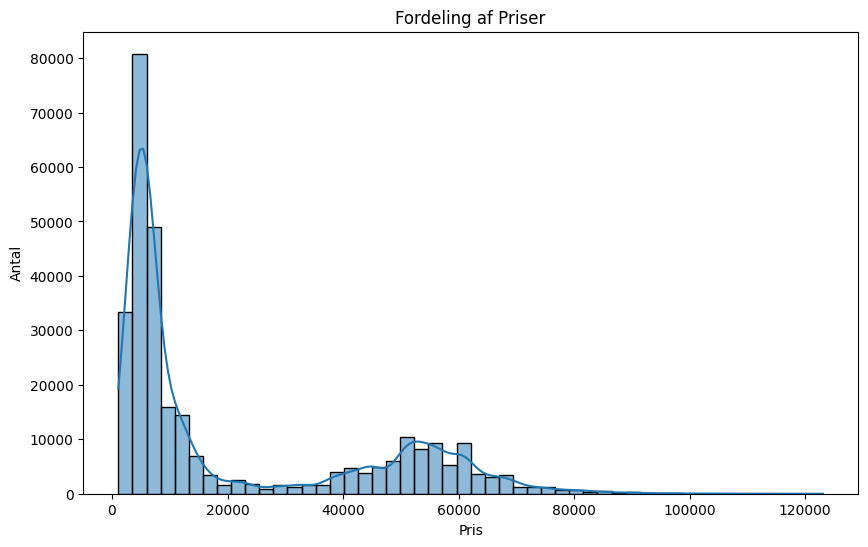

Skævhed (Skewness): 1.0613719490179376
Kurtosis: -0.3963061069535949
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er fladere end en normalfordeling (lav kurtosis).


In [21]:
from scipy.stats import skew, kurtosis  

# Plotter histogram med KDE for prisfordeling
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser')
plt.ylabel('Antal')
plt.xlabel('Pris')
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())  # Fjerner NaN-værdier før beregning
kurt = kurtosis(df['price'].dropna())  # Fjerner NaN-værdier før beregning

# Udskriver resultaterne
print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

# Tolkning af skævhed og kurtosis:
if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen har en højre hale og færre ekstreme værdier end en normalfordeling, hvilket kan indikere, at dataene er mere spredte og ikke indeholder så mange outliers. Skævheden tyder på, at vi har flere lavere værdier med nogle højere outliers, som vi vil fjerne ved hjælp af z-score teknikken for at forbedre modellens præcision.